#### Collate CSV Files

In [16]:
import pandas as pd

path = 'C.../StopSearch only/' #data.police.uk stop-and-search 2018-2020 all

years = ['2018','2019','2020']
months = [str(x) for x in range(1,13)]

periods = []

for y in years:
    for m in months:
        if int(m) < 10:
            temp = y + '-0' + m
            periods.append(temp)
        else:
            temp = y + '-' + m
            periods.append(temp)
            
counties = ['avon-and-somerset','bedfordshire','btp','cambridgeshire','cheshire','city-of-london','cleveland','cumbria',
         'derbyshire','devon-and-cornwall','dorset','durham','dyfed-powys','essex','gloucestershire','greater-manchester',
         'gwent','hampshire','hertfordshire','humberside','kent','lancashire','leicestershire','lincolnshire','merseyside',
         'metropolitan','norfolk','northamptonshire','northumbria','north-wales','north-yorkshire','nottinghamshire',
         'south-wales','south-yorkshire','staffordshire','suffolk','surrey','sussex','thames-valley','warwickshire',
         'west-mercia','west-midlands','west-yorkshire','wiltshire']
# print(path1 + periods[0] +'/' + periods[0] + '-' + counties[1] + '-stop-and-search.csv')

k = 0
missing = []
df = pd.DataFrame()
for p in periods:
    for c in counties:
        filename = path + p +'/' + p + '-' + c + '-stop-and-search.csv'
        try:
            temp = pd.read_csv(filename)
            df = df.append(temp, ignore_index = True).copy()
        except FileNotFoundError: #missing data for some periods/counties. Count how many and see which and when
            k = k + 1
            missing.append(p)
            missing.append(c)

Preprocess data

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import aif360

df_orig = df.copy()
print (k, 'missing files for month/county combination')
print(missing)
df.dropna(subset=['Self-defined ethnicity', 'Outcome'], inplace= True) 
df.shape

0 missing files for month/county combination
['2018-10', 'merseyside', '2019-07', 'greater-manchester', '2019-08', 'greater-manchester', '2019-08', 'gwent', '2019-09', 'greater-manchester', '2019-10', 'greater-manchester', '2019-11', 'greater-manchester', '2019-12', 'greater-manchester', '2020-01', 'greater-manchester', '2020-02', 'greater-manchester', '2020-03', 'greater-manchester', '2020-04', 'greater-manchester', '2020-05', 'greater-manchester', '2020-06', 'greater-manchester', '2020-07', 'greater-manchester', '2020-08', 'greater-manchester', '2020-09', 'greater-manchester', '2020-10', 'greater-manchester', '2020-11', 'greater-manchester', '2020-12', 'gloucestershire', '2020-12', 'greater-manchester', '2020-12', 'humberside', '2020-12', 'lincolnshire']


(1460396, 15)

#### Summary Statistics

In [20]:
df_orig.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [21]:
for col in df_orig.columns:
    print(col )
    print('******************')
    print(df[col].describe())
    print('-------------------------')

Type
******************
count           1460396
unique                3
top       Person search
freq            1123323
Name: Type, dtype: object
-------------------------
Date
******************
count                       1460396
unique                       665144
top       2019-05-30T23:00:00+00:00
freq                            256
Name: Date, dtype: object
-------------------------
Part of a policing operation
******************
count     1048272
unique          2
top         False
freq      1015090
Name: Part of a policing operation, dtype: object
-------------------------
Policing operation
******************
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Policing operation, dtype: float64
-------------------------
Latitude
******************
count    1.202470e+06
mean     5.195009e+01
std      8.705799e-01
min      4.992230e+01
25%      5.148029e+01
50%      5.154161e+01
75%      5.241113e+01
max      5.747990e+01

In [22]:
df['Self-defined ethnicity'].unique()

array(['Asian/Asian British - Pakistani',
       'Mixed/Multiple ethnic groups - White and Black Caribbean',
       'White - English/Welsh/Scottish/Northern Irish/British',
       'Black/African/Caribbean/Black British - Caribbean',
       'Other ethnic group - Not stated',
       'Black/African/Caribbean/Black British - African',
       'Other ethnic group - Any other ethnic group',
       'White - Any other White background',
       'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
       'Asian/Asian British - Any other Asian background',
       'Mixed/Multiple ethnic groups - White and Black African',
       'Asian/Asian British - Bangladeshi',
       'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
       'Asian/Asian British - Indian', 'White - Irish',
       'Mixed/Multiple ethnic groups - White and Asian',
       'Asian/Asian British - Chinese', 'Other ethnic group - Arab',
       'White - Gypsy or Irish Travelle

In [23]:
df['Outcome'].value_counts()

A no further action disposal                                    1078249
Arrest                                                           187040
Community resolution                                              87382
Khat or Cannabis warning                                          33672
Summons / charged by post                                         25728
Penalty Notice for Disorder                                       22675
Nothing found - no further action                                 12608
Caution (simple or conditional)                                    6027
Suspect arrested                                                   3399
Offender given drugs possession warning                            1291
Local resolution                                                    948
Article found - Detailed outcome unavailable                        568
Suspect summonsed to court                                          417
Offender given penalty notice                                   

#### Start Exploring and Plotting

Text(0, -6, 'Fig. 1. Outcomes per self-defined ethnicity showing proportion of arrests.')

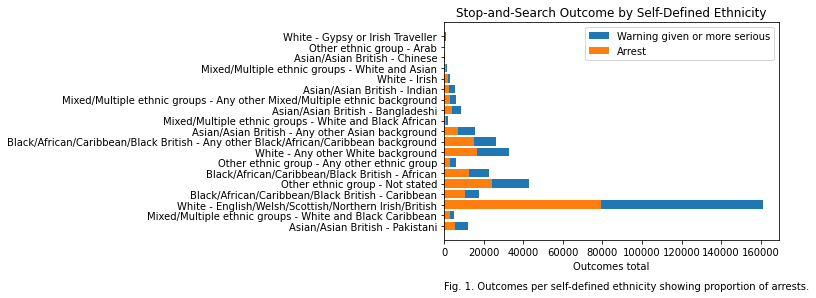

In [35]:
ethnicities = df['Self-defined ethnicity'].unique()

count_positive_crime = []
count_arrests = []
percentages = []

for eth in ethnicities:
    k = df[(df['Self-defined ethnicity'] == eth) & (df['Outcome'] != 'A no further action disposal') & (df['Outcome'] != 'Nothing found - no further action')].shape[0]
    k1 = df[(df['Self-defined ethnicity'] == eth) & (df['Outcome'].str.contains('rrest') == True)].shape[0]
    
    count_positive_crime.append(k)
    count_arrests.append(k1)
    percentages.append(eth + '   &   ' + str(round(k1/k*100,2)) + '\\')
    
p1 = plt.barh(ethnicities, count_positive_crime)
plt.xlabel('Outcomes total')
plt.title('Stop-and-Search Outcome by Self-Defined Ethnicity')

p2 = plt.barh(ethnicities, count_arrests)

plt.legend( (p1[0],p2[0]), ('Warning given or more serious','Arrest') )
plt.text(0,-6,'Fig. 1. Outcomes per self-defined ethnicity showing proportion of arrests.')

###SHOW NEXT ARRESTS PER White Asian Black

In [34]:
for i in range(len(percentages)-1,-1,-1):
    print(percentages[i])

White - Gypsy or Irish Traveller   &   57.67\
Other ethnic group - Arab   &   50.7\
Asian/Asian British - Chinese   &   50.09\
Mixed/Multiple ethnic groups - White and Asian   &   47.46\
White - Irish   &   66.07\
Asian/Asian British - Indian   &   43.65\
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background   &   49.92\
Asian/Asian British - Bangladeshi   &   47.02\
Mixed/Multiple ethnic groups - White and Black African   &   55.43\
Asian/Asian British - Any other Asian background   &   44.22\
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background   &   57.39\
White - Any other White background   &   50.46\
Other ethnic group - Any other ethnic group   &   48.97\
Black/African/Caribbean/Black British - African   &   55.71\
Other ethnic group - Not stated   &   56.52\
Black/African/Caribbean/Black British - Caribbean   &   58.94\
White - English/Welsh/Scottish/Northern Irish/British   &   49.28\
Mixed/Multiple ethnic groups - White and 

In [ ]:
# conflate identity into b/ w/ a

df['W-B-A'] = np.where(df['Self-defined ethnicity'].str.contains('Black') , 'Black',
                      np.where(df['Self-defined ethnicity'].str.contains('White'), 'White',
                              np.where(df['Self-defined ethnicity'].str.contains('Asian'), 'Asian', 'Other')))
df['W-B-A'].unique()

Text(-0.75, -110000, 'Fig 2. Arrests, warnings and local resolutions to positive stop-and-search outcomes,\nby race group, UK 2018-2020.\n\n% arrests                                  % warning or caution                         % Local resolution \nWhite: 49.74%                         14.69%                                               22.85%\nBlack: 57.26%                          5.69%                                                 24.04%\nAsian: 45.58%                          8.97%                                                 27.89%\nOther: 54.94%')

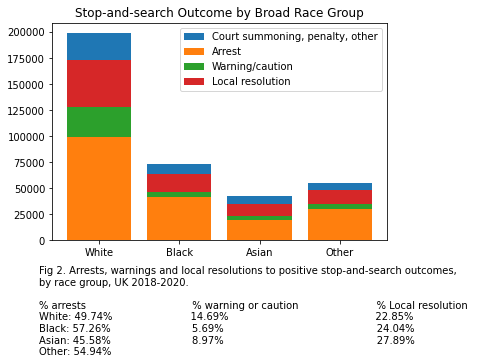

In [13]:
arrests_w = df[(df['W-B-A']=='White') & (df['Outcome'].str.contains('rrest') == True)].shape[0]
arrests_b = df[(df['W-B-A']=='Black') & (df['Outcome'].str.contains('rrest') == True)].shape[0]
arrests_a = df[(df['W-B-A']=='Asian') & (df['Outcome'].str.contains('rrest') == True)].shape[0]
arrests_o = df[(df['W-B-A']=='Other') & (df['Outcome'].str.contains('rrest') == True)].shape[0]

crime_w = df[(df['W-B-A'] == 'White') & (df['Outcome'] != 'A no further action disposal') & (df['Outcome'] != 'Nothing found - no further action')].shape[0]
crime_b = df[(df['W-B-A'] == 'Black') & (df['Outcome'] != 'A no further action disposal') & (df['Outcome'] != 'Nothing found - no further action')].shape[0]
crime_a = df[(df['W-B-A'] == 'Asian') & (df['Outcome'] != 'A no further action disposal') & (df['Outcome'] != 'Nothing found - no further action')].shape[0]
crime_o = df[(df['W-B-A'] == 'Other') & (df['Outcome'] != 'A no further action disposal') & (df['Outcome'] != 'Nothing found - no further action')].shape[0] 

drug_warning_w = df[(df['W-B-A'] == 'White') & (df['Outcome'].str.contains('warning') | df['Outcome'].str.contains('aution'))].shape[0]
drug_warning_b = df[(df['W-B-A'] == 'Black') & (df['Outcome'].str.contains('warning') | df['Outcome'].str.contains('aution'))].shape[0]
drug_warning_a = df[(df['W-B-A'] == 'Asian') & (df['Outcome'].str.contains('warning') | df['Outcome'].str.contains('aution'))].shape[0]
drug_warning_o = df[(df['W-B-A'] == 'Other') & (df['Outcome'].str.contains('warning') | df['Outcome'].str.contains('aution'))].shape[0]

resolution_w = df[(df['W-B-A']=='White') & (df['Outcome'].str.contains('resolution'))].shape[0]
resolution_b = df[(df['W-B-A']=='Black') & (df['Outcome'].str.contains('resolution'))].shape[0]
resolution_a = df[(df['W-B-A']=='Asian') & (df['Outcome'].str.contains('resolution'))].shape[0]
resolution_o = df[(df['W-B-A']=='Other') & (df['Outcome'].str.contains('resolution'))].shape[0]

p11 = plt.bar(['White', 'Black', 'Asian', 'Other'], [crime_w, crime_b, crime_a, crime_o])
p22 = plt.bar(['White', 'Black', 'Asian', 'Other'], [arrests_w, arrests_b, arrests_a, arrests_o])
p33 = plt.bar(['White', 'Black', 'Asian', 'Other'], [drug_warning_w, drug_warning_b, drug_warning_a, drug_warning_o], bottom = [arrests_w, arrests_b, arrests_a, arrests_o])
p44 = plt.bar(['White', 'Black', 'Asian', 'Other'], [resolution_w, resolution_b, resolution_a, resolution_o], bottom = [drug_warning_w + arrests_w, drug_warning_b + arrests_b, drug_warning_a + arrests_a, drug_warning_o + arrests_o])
plt.title('Stop-and-search Outcome by Broad Race Group')
plt.legend((p11[0], p22[0], p33[0], p44[0]), ['Court summoning, penalty, other', 'Arrest', 'Warning/caution', 'Local resolution'] )
#plt.xlabel('Race Group')
t1 = 'Fig 2. Arrests, warnings and local resolutions to positive stop-and-search outcomes,\nby race group, UK 2018-2020.\n'
t2 = '\n% arrests                                  % warning or caution                         % Local resolution \n'
t3 = 'White: ' + str(round(arrests_w/crime_w*100,2)) +'%' + '                         ' + str(round(drug_warning_w/crime_w*100,2)) + '%'  + '                                               ' + str(round(resolution_w/crime_w*100,2)) + '%'
t4 = '\nBlack: ' + str(round(arrests_b/crime_b*100,2)) + '%' + '                          ' + str(round(drug_warning_b/crime_b*100,2)) + '%' + '                                                 ' + str(round(resolution_b/crime_b*100,2)) + '%'
t5 = '\nAsian: ' + str(round(arrests_a/crime_a*100,2)) + '%' + '                          ' + str(round(drug_warning_a/crime_a*100,2)) + '%' + '                                                 ' + str(round(resolution_a/crime_a*100,2)) +'%'
t6 = '\nOther: ' + str(round(arrests_o/crime_o*100,2)) + '%'
tf = t1+t2+t3+t4+t5+t6
plt.text(-0.75,-110000, tf)